## ProcTHOR Environment check

In [ ]:
import prior
from ai2thor.controller import Controller
from PIL import Image
from ai2thor.platform import CloudRendering

import os

dataset = prior.load_dataset("procthor-10k")
house = dataset["train"][0]

controller = Controller(
            agentMode="default",
            visibilityDistance=1.5,
            gridSize=0.25,
            snapToGrid=False,
            rotateStepDegrees=90,
            renderDepthImage=True,
            # renderInstanceSegmentation=True, # for instance annotation
            platform=CloudRendering,
            width=512,
            height=512,
            fieldOfView=90,
            gpuDevice=0 
        )




[AI2-THOR WARNING] There has been an update to ProcTHOR-10K that must be used with AI2-THOR version 5.0+. To use the new version of ProcTHOR-10K, please update AI2-THOR to version 5.0+ by running:
    pip install --upgrade ai2thor
Alternatively, to downgrade to the old version of ProcTHOR-10K, run:
   prior.load_dataset("procthor-10k", revision="ab3cacd0fc17754d4c080a3fd50b18395fae8647")


Loading test: 100%|██████████| 1000/1000 [00:00<00:00, 7643.57it/s]


#### If you can check RGB observation, setting ProcTHOR environment is properly done!

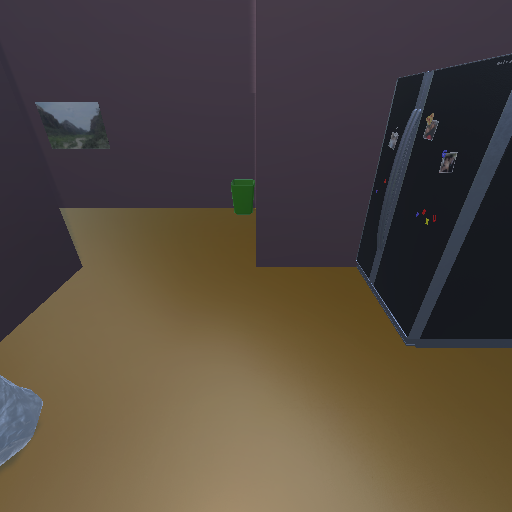

In [2]:
controller.reset(house)

observation = controller.last_event.frame

Image.fromarray(observation)

## HM3D Environment Check 

In [13]:

## HM3D Environment Check 
import habitat_sim
import magnum as mn
from PIL import Image
import numpy as np
import os

# Define settings
scene_path = "../data/hm3d/val/00801-HaxA7YrQdEC/HaxA7YrQdEC.basis.glb" # Adjust path relative to notebook location


sim_settings = {
    "width": 512,
    "height": 512,
    "scene": scene_path,
    "default_agent": 0,
    "sensor_height": 1.5,
    "color_sensor": True,
}

def make_simple_cfg(settings):
    # simulator backend
    sim_cfg = habitat_sim.SimulatorConfiguration()
    sim_cfg.scene_id = settings["scene"]
    # sim_cfg.scene_dataset_config_file = "data/hm3d/hm3d_annotated_basis.scene_dataset_config.json" # Optional if using dataset config

    # agent
    agent_cfg = habitat_sim.agent.AgentConfiguration()

    # RGB sensor
    rgb_sensor_spec = habitat_sim.CameraSensorSpec()
    rgb_sensor_spec.uuid = "color_sensor"
    rgb_sensor_spec.sensor_type = habitat_sim.SensorType.COLOR
    rgb_sensor_spec.resolution = [settings["height"], settings["width"]]
    rgb_sensor_spec.position = [0.0, settings["sensor_height"], 0.0]
    
    agent_cfg.sensor_specifications = [rgb_sensor_spec]

    return habitat_sim.Configuration(sim_cfg, [agent_cfg])



Renderer: NVIDIA H200/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 570.133.20
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


[17:10:02:477746]:[Warning]:[Metadata] SceneDatasetAttributes.cpp(107)::addNewSceneInstanceToDataset : Dataset : 'default' : Lighting Layout Attributes 'no_lights' specified in Scene Attributes but does not exist in dataset, so creating default.
[17:10:02:478944]:[Warning]:[Scene] SemanticScene.h(331)::checkFileExists : ::loadSemanticSceneDescriptor: File `../data/hm3d/val/00801-HaxA7YrQdEC/HaxA7YrQdEC.basis.scn` does not exist.  Aborting load.
[17:10:02:478963]:[Warning]:[Scene] SemanticScene.cpp(123)::loadSemanticSceneDescriptor : SSD File Naming Issue! Neither SemanticAttributes-provided name : `../data/hm3d/val/00801-HaxA7YrQdEC/HaxA7YrQdEC.basis.scn` nor constructed filename : `../data/hm3d/val/00801-HaxA7YrQdEC/info_semantic.json` exist on disk.
[17:10:02:478969]:[Error]:[Scene] SemanticScene.cpp(139)::loadSemanticSceneDescriptor : SSD Load Failure! File with SemanticAttributes-provided name `../data/hm3d/val/00801-HaxA7YrQdEC/HaxA7YrQdEC.basis.scn` exists but failed to load.
[17

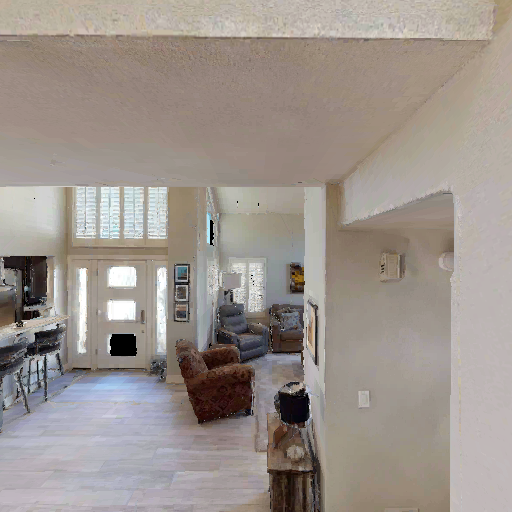

In [14]:
cfg = make_simple_cfg(sim_settings)
sim = habitat_sim.Simulator(cfg)

# Initialize agent
agent = sim.initialize_agent(sim_settings["default_agent"])
agent_state = habitat_sim.AgentState()

# Sample a navigable point
random_nav_point = sim.pathfinder.get_random_navigable_point()
agent_state.position = random_nav_point
agent.set_state(agent_state)

# Get observation
obs = sim.get_sensor_observations()
rgb = obs["color_sensor"]

# Display image
img = Image.fromarray(rgb, mode="RGBA") # Habitat returns RGBA usually
sim.close()

img
